In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne, load_dataset
from datetime import datetime
from Bio import AlignIO
from Bio import SeqIO

plt.rcParams["font.family"] = "Helvetica"
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# Figure 5B: Mutational Frequency for Countries

In [179]:
alignment = AlignIO.read("/Users/estefanyguzman/Downloads/111723-RSVB-post2020.mafft.prot.fst", "fasta")

# Reference sequence GB505a sequence is the first sequence in the alignment file
ref_seq= alignment[0]

# Initialize a list to store the positions with mutations
mutation_positions = []
mutation_dict = {}

for i in range(len(ref_seq)):
    ref_aa = ref_seq[i]
    aa_set = set()
    for record in alignment:
        if record.id != ref_seq.id:
            if record.seq[i] != ref_aa:
                aa_set.add(record.seq[i])
    if aa_set:
        mutation_positions.append(i+1)
        mutation_dict[i+1] = list(aa_set)
        
RSVB_G_post = pd.DataFrame.from_dict(mutation_dict, orient='index')
RSVB_G_post.columns =['A','B']
RSVB_G_post = RSVB_G_post.stack()
RSVB_G_post = RSVB_G_post.reset_index()
RSVB_G_post.columns = ['index', 'level', 'mutations']
RSVB_G_post = RSVB_G_post.drop(['level'], axis=1)
reference = SeqIO.read("MRCA-RSVB-F.fa", "fasta")
sequence = str(reference.seq)

def get_amino_acid(position):
    return sequence[position - 1]

RSVB_G_post['reference'] = RSVB_G_post['index'].apply(get_amino_acid)
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['reference'] == '-'].index, inplace=True)

#RSVB_G_post

records = list(SeqIO.parse("/Users/estefanyguzman/Downloads/111723-RSVB-post2020.mafft.prot.fst", "fasta"))

frequencies = []
for _, row in RSVB_G_post.iterrows():
    position = row["index"] - 1
    for amino_acid in row["mutations"].split(","):
        count = sum(1 for record in records if record.seq[position] == amino_acid)
        frequency = count / len(records)
        frequencies.append(frequency)
        
#AAB variable is the "After" frequency
RSVB_G_post["AAB"] = frequencies
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['mutations'] == '-'].index, inplace=True)
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['reference'] == '-'].index, inplace=True)
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['mutations'] == 'X'].index, inplace=True)
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['reference'] == 'x'].index, inplace=True)
RSVB_G_post.drop(RSVB_G_post.loc[RSVB_G_post['AAB'] < 0.05].index, inplace=True)


RSVB_G_post["mutation"] =  RSVB_G_post["reference"] + RSVB_G_post["index"].astype(str) + RSVB_G_post["mutations"]

RSVB_G_post


,index,mutations,reference,AAB,mutation
18,42,K,R,0.317708,R42K
48,190,N,S,0.552083,S190N
49,191,R,K,0.937500,K191R
51,206,M,I,0.937500,I206M
52,209,R,Q,0.911458,Q209R
53,211,N,S,0.578125,S211N
60,312,H,P,0.057292,P312H
71,389,P,S,0.546875,S389P
103,574,K,K,0.442708,K574K


In [180]:
##comparison of mutations for sequences 2016 - 2020

# Load the multiple sequence alignment
alignment = AlignIO.read("/Users/estefanyguzman/Downloads/111723-RSVB-pre2020.mafft.prot.fst", "fasta")

# Get the reference sequence (assuming it's the first sequence in the alignment)
ref_seq= alignment[0]

# Initialize a list to store the positions with mutations
mutation_positions = []

# Initialize a dictionary to store the unique amino acids for each position
mutation_dict = {}

# Loop through each position in the reference sequence and compare it to the corresponding positions in the other sequences
for i in range(len(ref_seq)):
    ref_aa = ref_seq[i]
    aa_set = set()
    for record in alignment:
        if record.id != ref_seq.id:
            if record.seq[i] != ref_aa:
                aa_set.add(record.seq[i])
    if aa_set:
        mutation_positions.append(i+1)
        mutation_dict[i+1] = list(aa_set)
        
# Create a pandas DataFrame to store the mutation information
RSVB_G_pre = pd.DataFrame.from_dict(mutation_dict, orient='index')
RSVB_G_pre.columns =['A','B','C','D','E']
RSVB_G_pre = RSVB_G_pre.stack()
RSVB_G_pre = RSVB_G_pre.reset_index()
RSVB_G_pre.columns = ['index', 'level', 'mutations']
RSVB_G_pre = RSVB_G_pre.drop(['level'], axis=1)
reference = SeqIO.read("MRCA-RSVB-F.fa", "fasta")
sequence = str(reference.seq)

def get_amino_acid(position):
    return sequence[position - 1]

RSVB_G_pre['reference'] = RSVB_G_pre['index'].apply(get_amino_acid)
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['reference'] == '-'].index, inplace=True)

#RSVB_G_pre

# Load multi-fasta file
records = list(SeqIO.parse("/Users/estefanyguzman/Downloads/111723-RSVB-pre2020.mafft.prot.fst", "fasta"))

# Calculate frequency for each combination of position and amino acid
frequencies = []
for _, row in RSVB_G_pre.iterrows():
    position = row["index"] - 1
    for amino_acid in row["mutations"].split(","):
        count = sum(1 for record in records if record.seq[position] == amino_acid)
        frequency = count / len(records)
        frequencies.append(frequency)
        

# Add frequencies as a new column in the DataFrame
RSVB_G_pre["AAA"] = frequencies
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['mutations'] == '-'].index, inplace=True)
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['reference'] == '-'].index, inplace=True)
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['mutations'] == 'X'].index, inplace=True)
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['reference'] == 'x'].index, inplace=True)
RSVB_G_pre.drop(RSVB_G_pre.loc[RSVB_G_pre['AAA'] < 0.05].index, inplace=True)


RSVB_G_pre["mutation"] =  RSVB_G_pre["reference"] + RSVB_G_pre["index"].astype(str) + RSVB_G_pre["mutations"]



In [136]:
merged_left1 = pd.merge(left=RSVB_G_pre, right=RSVB_G_post, how='outer', on='mutation')
df_ordered = merged_left1[["mutation","frequency_pro", "frequency_pre",'index_x']]
df_ordered['frequency_pro'] = df_ordered['frequency_pro'] * 100
df_ordered['frequency_pre'] = df_ordered['frequency_pre'] * 100
df = pd.DataFrame()
df['mutation'] = df_ordered['mutation']
df_ordered['mutation_number'] = df_ordered['mutation'].str.extract(r'(\d+)').astype(float)

pivot = df_ordered.pivot_table(index='mutation', values=['frequency_pre','frequency_pro','mutation_number'])
pivot.fillna(0, inplace=True)



/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/898689756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordered['frequency_pro'] = df_ordered['frequency_pro'] * 100
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/898689756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordered['frequency_pre'] = df_ordered['frequency_pre'] * 100
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/898689756.py:7: SettingWithCopyWarning: 
A value is trying to be 

In [137]:
pivot.sort_index(axis=1, ascending=True, inplace=True)
pivot.fillna(0, inplace=True)
indexx = 'mutation_number'
pivot = pivot.sort_values(by = indexx)
pivot = pivot.drop(columns='mutation_number')

In [139]:
#This is for getting the bar thingy you need to move this bih
# Group by the 'index' column and sum the 'frequency_pre' values
#merged_data = RSVB_G_post.groupby('index')['frequency_pro'].sum().reset_index()

# The result will be a DataFrame with merged rows
#merged_data

In [140]:
#This is for getting the bar thingy you need to move this bih
#total_F_length = pd.DataFrame({'index': range(1, 575)})
#merging_F_freq = total_F_length.merge(merged_data, on='index', how='left').fillna(0)
#merging_F_freq

In [141]:
#This is for getting the bar thingy you need to move this bih
#pivot = merging_F_freq.pivot_table(index='index', values=['frequency_pro'])

In [142]:
#This is for getting the bar thingy you need to move this bih
#pivot1 = pivot * 100

In [143]:
pivot

,frequency_pre,frequency_pro
mutation,,
F12L,7.165707,0.000000
R42K,0.000000,31.770833
S190N,0.000000,55.208333
K191R,62.763916,93.750000
I206M,62.763916,93.750000
Q209R,62.124120,91.145833
S211N,0.000000,57.812500
S276N,6.973768,0.000000
P312H,0.000000,5.729167


In [144]:
pivot.drop(pivot.loc[pivot['frequency_pro'] <= 0].index, inplace=True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


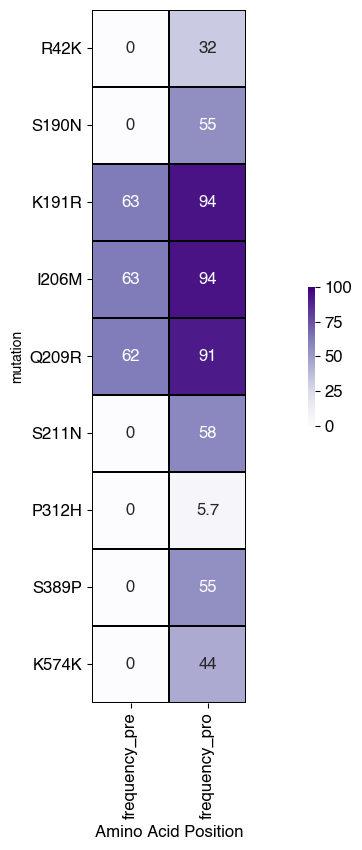

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize=(16, 9))
g = sns.heatmap(pivot, 
                linewidths=.05, 
                linecolor='black', 
                square=True, 
                cmap='Purples', 
                cbar_kws={"shrink": 0.2}, 
                annot=True,
               annot_kws={"fontsize":12},
               vmin=0,
               vmax=100)

g.set_yticklabels(g.get_yticklabels(), 
                  rotation = 0, 
                  fontsize = 12)

g.set_xticklabels(g.get_xticklabels(), 
                  fontsize = 12)
g.set_xlabel('Amino Acid Position', fontsize=12)

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)

plt.savefig("117323-RSVB-pre-post-mutations.pdf", format='pdf')
plt.show()


NameError: name 'pivot1' is not defined

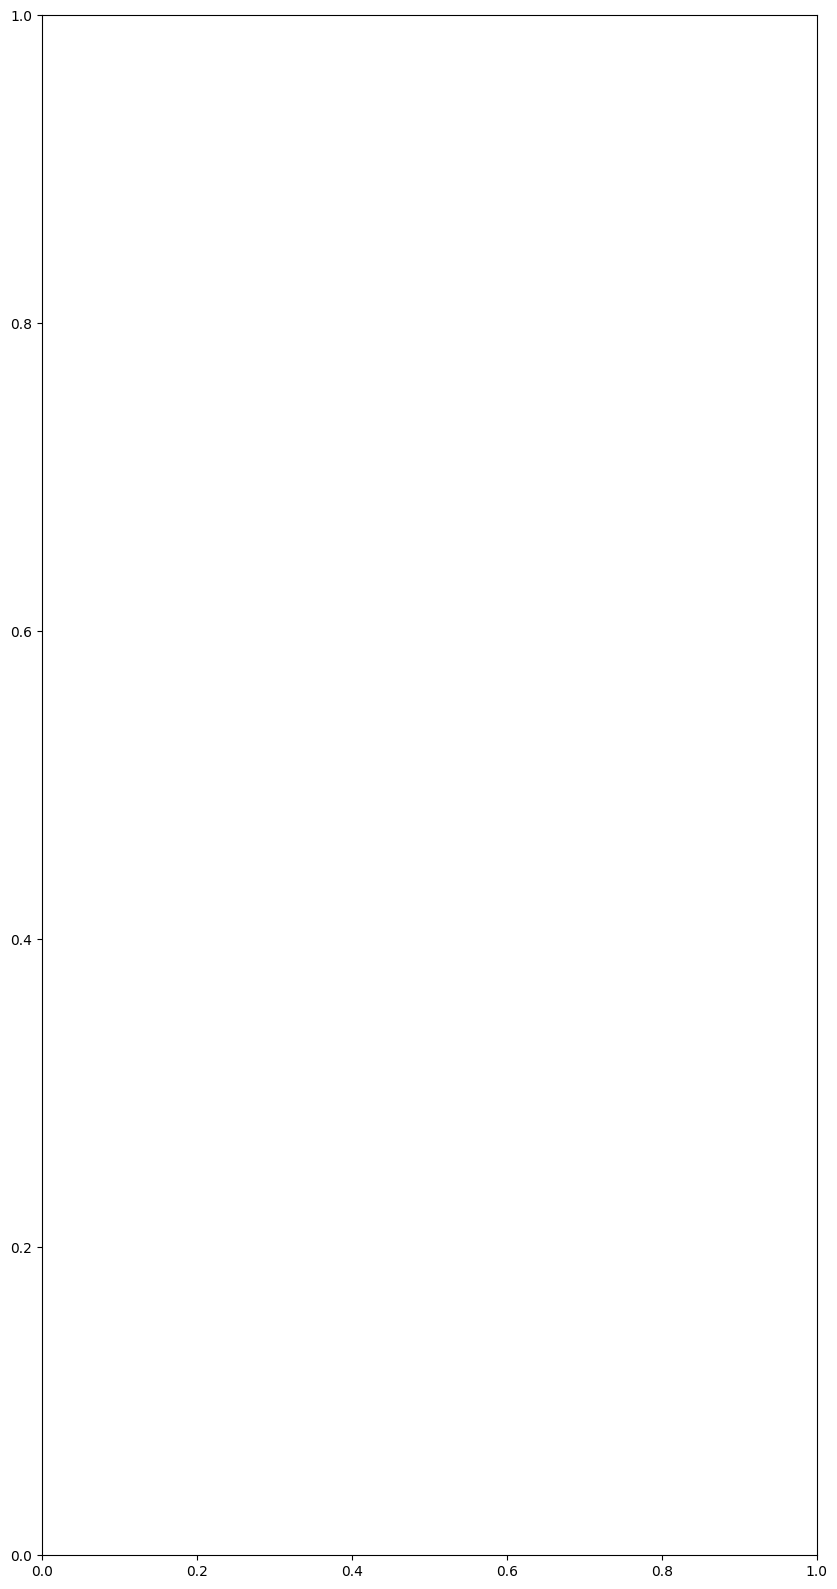

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize=(10, 20))
g = sns.heatmap(pivot1, 
                linewidths=.0001, 
                linecolor='white', 
                square=False, 
                cmap='Purples', 
                cbar_kws={"shrink": 0.2}, 
                annot=False,
               annot_kws={"fontsize":12},
               vmin=0,
               vmax=100)

g.set_yticklabels(g.get_yticklabels(), 
                  rotation = 0, 
                  fontsize = 12)

g.set_xticklabels(g.get_xticklabels(), 
                  fontsize = 12)
g.set_xlabel('Amino Acid Position', fontsize=12)

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)

#plt.savefig("102323-RSVB-mutations-thebarforpost.pdf", format='pdf')
plt.show()


In [102]:
def sequence_mutation(align, column, mutation_category):
    alignment = AlignIO.read(align, "fasta")

    ref_seq= alignment[0]
    mutation_positions = []
    mutation_dict = {}
    for i in range(len(ref_seq)):
        ref_aa = ref_seq[i]
        aa_set = set()
        for record in alignment:
            if record.id != ref_seq.id:
                if record.seq[i] != ref_aa:
                    aa_set.add(record.seq[i])
        if aa_set:
            mutation_positions.append(i+1)
            mutation_dict[i+1] = list(aa_set)
        
# Create a pandas DataFrame to store the mutation information
    name = pd.DataFrame.from_dict(mutation_dict, orient='index')
    name.columns = column
    name = name.stack()
    name = name.reset_index()
    name.columns = ['index', 'level', 'mutations']
    name = name.drop(['level'], axis=1)
    reference = SeqIO.read("Common_Ancestor.fst", "fasta")
    sequence = str(reference.seq)

    def get_amino_acid(position):
            return sequence[position - 1]

    name['reference'] = name['index'].apply(get_amino_acid)
    name.drop(name.loc[name['reference'] == '-'].index, inplace=True)

#name

# Load multi-fasta file
    records = list(SeqIO.parse(align, "fasta"))

# Calculate frequency for each combination of position and amino acid
    frequencies = []
    for _, row in name.iterrows():
        position = row["index"] - 1
        for amino_acid in row["mutations"].split(","):
            count = sum(1 for record in records if record.seq[position] == amino_acid)
            frequency = count / len(records)
            frequencies.append(frequency)
        

# Add frequencies as a new column in the DataFrame
    name[mutation_category] = frequencies
    name.drop(name.loc[name['mutations'] == '-'].index, inplace=True)
    name.drop(name.loc[name['reference'] == '-'].index, inplace=True)
    name.drop(name.loc[name['mutations'] == 'X'].index, inplace=True)
    name.drop(name.loc[name['reference'] == 'x'].index, inplace=True)
    


    name["mutation"] =  name["reference"] + name["index"].astype(str) + name["mutations"]

    
    return name


In [104]:
#Australia
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Australia.mafft.fst"
column = ['A']

RSVB_F_Australia = sequence_mutation(align,column, mutation_category="Australia")
RSVB_F_Australia = RSVB_F_Australia.drop(columns='index')

In [105]:
#Austria
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Austria.mafft.fst"
column = ['A']
RSVB_F_Austria = pd.DataFrame()

RSVB_F_Austria = sequence_mutation(align,column, mutation_category="Austria")
RSVB_F_Austria = RSVB_F_Austria.drop(columns='index')

In [106]:
#Canada
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Canada.mafft.fst"
column = ['A']
RSVB_F_Canada = pd.DataFrame()

RSVB_F_Canada = sequence_mutation(align,column, mutation_category="Canada")
RSVB_F_Canada = RSVB_F_Canada.drop(columns='index')

In [107]:
#Finland
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Finland.mafft.fst"
column = ['A']
RSVB_F_Finland = pd.DataFrame()

RSVB_F_Finland = sequence_mutation(align,column, mutation_category="Finland")
RSVB_F_Finland = RSVB_F_Finland.drop(columns='index')

In [108]:
#France
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.France.mafft.fst"
column = ['A']
RSVB_F_France = pd.DataFrame()

RSVB_F_France = sequence_mutation(align,column, mutation_category="France")
RSVB_F_France = RSVB_F_France.drop(columns='index')

In [109]:
#Germany
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Germany.mafft.fst"
column = ['A']
RSVB_F_Germany = pd.DataFrame()

RSVB_F_Germany = sequence_mutation(align,column, mutation_category="Germany")
RSVB_F_Germany = RSVB_F_Germany.drop(columns='index')

In [110]:
#Italy
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Italy.mafft.fst"
column = ['A']
RSVB_F_Italy = pd.DataFrame()

RSVB_F_Italy = sequence_mutation(align,column, mutation_category="Italy")
RSVB_F_Italy = RSVB_F_Italy.drop(columns='index')

In [111]:
#Kenya
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Kenya.mafft.fst"
column = ['A']
RSVB_F_Kenya = pd.DataFrame()

RSVB_F_Kenya = sequence_mutation(align,column, mutation_category="Kenya")
RSVB_F_Kenya = RSVB_F_Kenya.drop(columns='index')

In [112]:
#Mexico
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Mexico.mafft.fst"
column = ['A']
RSVB_F_Mexico = pd.DataFrame()

RSVB_F_Mexico = sequence_mutation(align,column, mutation_category="Mexico")
RSVB_F_Mexico = RSVB_F_Mexico.drop(columns='index')

In [113]:
#Netherlands
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Netherlands.mafft.fst"
column = ['A']
RSVB_F_Netherlands = pd.DataFrame()

RSVB_F_Netherlands = sequence_mutation(align,column, mutation_category="Netherlands")
RSVB_F_Netherlands = RSVB_F_Netherlands.drop(columns='index')

In [114]:
#Russia
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Russia.mafft.fst"
column = ['A']
RSVB_F_Russia = pd.DataFrame()

RSVB_F_Russia = sequence_mutation(align,column, mutation_category="Russia")
RSVB_F_Russia = RSVB_F_Russia.drop(columns='index')

In [115]:
#SouthAfrica
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.SouthAfrica.mafft.fst"
column = ['A']
RSVB_F_SouthAfrica = pd.DataFrame()

RSVB_F_SouthAfrica = sequence_mutation(align,column, mutation_category="SouthAfrica")
RSVB_F_SouthAfrica = RSVB_F_SouthAfrica.drop(columns='index')

In [116]:
#SouthKorea
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.SouthKorea.mafft.fst"
column = ['A']
RSVB_F_SouthKorea = pd.DataFrame()

RSVB_F_SouthKorea = sequence_mutation(align,column, mutation_category="SouthKorea")
RSVB_F_SouthKorea = RSVB_F_SouthKorea.drop(columns='index')

In [117]:
#Spain
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.Spain.mafft.fst"
column = ['A']
RSVB_F_Spain = pd.DataFrame()

RSVB_F_Spain = sequence_mutation(align,column, mutation_category="Spain")
RSVB_F_Spain = RSVB_F_Spain.drop(columns='index')

In [118]:
#USA
align = "/Users/estefanyguzman/Documents/102323-RSVB-F-Countries-Compare/post2020/accession/fasta/RSVB-F.USA.mafft.fst"
column = ['A','B']
RSVB_F_USA = pd.DataFrame()

RSVB_F_USA = sequence_mutation(align,column, mutation_category="USA")

In [221]:
m1 = pd.merge(left=RSVB_F_USA, right=RSVB_F_Australia, how='outer').fillna(0)
m2 = pd.merge(left=m1, right=RSVB_F_Austria, how='left', left_on='mutation', right_on='mutation').fillna(0)
m3 = pd.merge(left=m2, right=RSVB_F_Canada, how='left', left_on='mutation', right_on='mutation').fillna(0)
m4 = pd.merge(left=m3, right=RSVB_F_Finland, how='left', left_on='mutation', right_on='mutation').fillna(0)
m5 = pd.merge(left=m4, right=RSVB_F_France, how='left', left_on='mutation', right_on='mutation').fillna(0)
m6 = pd.merge(left=m5, right=RSVB_F_Germany, how='left', left_on='mutation', right_on='mutation').fillna(0)
m7 = pd.merge(left=m6, right=RSVB_F_Italy, how='left', left_on='mutation', right_on='mutation').fillna(0)
m8 = pd.merge(left=m7, right=RSVB_F_Kenya, how='left', left_on='mutation', right_on='mutation').fillna(0)
m9 = pd.merge(left=m8, right=RSVB_F_Mexico, how='left', left_on='mutation', right_on='mutation').fillna(0)
m10 = pd.merge(left=m9, right=RSVB_F_Netherlands, how='left', left_on='mutation', right_on='mutation').fillna(0)
m11 = pd.merge(left=m10, right=RSVB_F_Russia, how='left', left_on='mutation', right_on='mutation').fillna(0)
m12 = pd.merge(left=m11, right=RSVB_F_SouthAfrica, how='left', left_on='mutation', right_on='mutation').fillna(0)
m13 = pd.merge(left=m12, right=RSVB_F_SouthKorea, how='left', left_on='mutation', right_on='mutation').fillna(0)
m14 = pd.merge(left=m13, right=RSVB_F_Spain, how='left', left_on='mutation', right_on='mutation').fillna(0)
df_ordered = m14[["mutation","USA", "Australia",'Austria','Canada',
                'Finland', 'France', 'Germany','Italy', 'Kenya',
                 'Mexico', 'Netherlands','Russia','SouthAfrica','SouthKorea','Spain','index']]
pivot = m14.pivot_table(index='mutation', values=["USA", "Australia",'Austria','Canada',
                'Finland', 'France', 'Germany','Italy', 'Kenya',
                 'Mexico', 'Netherlands','Russia','SouthAfrica','SouthKorea','Spain','index'])
pivot.fillna(0, inplace=True)

/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_72957/439785671.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reference_x', 'mutations_x'} in the result is deprecated and will raise a MergeError in a future version.
  m4 = pd.merge(left=m3, right=RSVB_F_Finland, how='left', left_on='mutation', right_on='mutation').fillna(0)
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_72957/439785671.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reference_x', 'mutations_x'} in the result is deprecated and will raise a MergeError in a future version.
  m6 = pd.merge(left=m5, right=RSVB_F_Germany, how='left', left_on='mutation', right_on='mutation').fillna(0)
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_72957/439785671.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'reference_x', 'mutations_x'} in the result is deprecated and will raise a MergeError in a future version.
  m8 = pd.merge(left=

In [181]:
import pandas as pd

# Define a list of DataFrames to merge
dataframes_to_merge = [RSVB_G_pre, RSVB_G_post,RSVB_F_USA, RSVB_F_Australia, RSVB_F_Austria, RSVB_F_Canada, RSVB_F_Finland, RSVB_F_France,
                       RSVB_F_Germany, RSVB_F_Italy, RSVB_F_Kenya, RSVB_F_Mexico, RSVB_F_Netherlands, RSVB_F_Russia,
                       RSVB_F_SouthAfrica, RSVB_F_SouthKorea, RSVB_F_Spain]

# Initialize the merged DataFrame with the first DataFrame
merged_df = dataframes_to_merge[0]

# Loop through the remaining DataFrames for merging using outer join
for df in dataframes_to_merge[1:]:
    merged_df = pd.merge(left=merged_df, right=df, how='outer', on='mutation').fillna(0)

# The merged_df now contains the result of all outer joins with missing values filled with 0
df_ordered = merged_df[["mutation","AAA","AAB","USA", "Australia",'Austria','Canada',
                'Finland', 'France', 'Germany','Italy', 'Kenya',
                 'Mexico', 'Netherlands','Russia','SouthAfrica','SouthKorea','Spain','index']]

df = pd.DataFrame()
df['mutation'] = df_ordered['mutation']
merged_df['mutation_number'] = df['mutation'].str.extract(r'(\d+)').astype(float)

pivot = merged_df.pivot_table(index='mutation', values=["AAA","AAB","USA", "Australia",'Austria','Canada',
                'Finland', 'France', 'Germany','Italy', 'Kenya',
                 'Mexico', 'Netherlands','Russia','SouthAfrica','SouthKorea','Spain','mutation_number'])

pivot.fillna(0, inplace=True)

/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/3135449732.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mutations_x', 'reference_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(left=merged_df, right=df, how='outer', on='mutation').fillna(0)
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/3135449732.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mutations_x', 'reference_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(left=merged_df, right=df, how='outer', on='mutation').fillna(0)
/var/folders/3n/4ymlf6h176q558ggsk_z_7nw0000gn/T/ipykernel_49655/3135449732.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mutations_x', 'reference_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(left=merged_df, right=df, how='outer',

In [184]:
pivot.sort_index(axis=1, ascending=True, inplace=True)
pivot.fillna(0, inplace=True)
indexx = 'mutation_number'
pivot = pivot.sort_values(by = indexx)
pivot = pivot.drop(columns='mutation_number')


In [186]:
pivot1 = pivot * 100

In [187]:
dropping_low_freq = (pivot1 < 10).all(axis=1)
pivot2 = pivot1[~dropping_low_freq]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


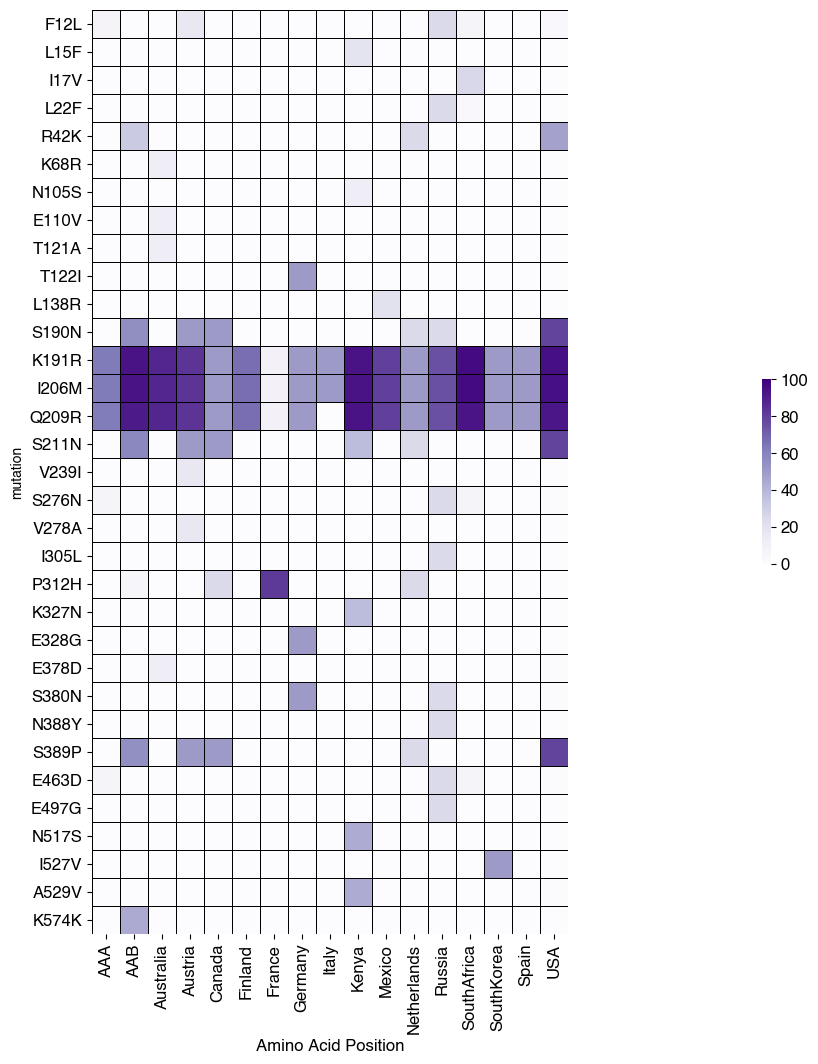

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(50, 12))
g = sns.heatmap(pivot2, 
                linewidths=0.5,  # Increase the line width to create outlines
                linecolor='black',  # Set the color of the outlines
                square=True, 
                cmap='Purples', 
                cbar_kws={"shrink": 0.2}, 
                annot=False,  # Turn off annotations to remove numbers
                vmin=0,
                vmax=100)

g.set_yticklabels(g.get_yticklabels(), 
                  rotation=0, 
                  fontsize=12)

g.set_xticklabels(g.get_xticklabels(), 
                  fontsize=12)
g.set_xlabel('Amino Acid Position', fontsize=12)

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 12
cbar.ax.tick_params(labelsize=12)

#plt.savefig("11723-RSVB-mutations-per-country-v3.pdf", format='pdf')
plt.show()
